# 데이터 불러오기

In [26]:
## 필요한 패키지를 불러옵니다.
import pandas as pd
import os

In [27]:
## 경로설정을 해줍니다.
os.chdir(r'C:\Users\kmlam\Documents\러닝스푼즈\기본 지도학습\data')
## 위의 경로설정은 제 컴퓨터를 기준으로 입력한 것으로 각자 데이터를 저장한 위치에 맞게 바꿔주시기 바랍니다.

In [28]:
## 데이터를 불러옵니다.
iris = pd.read_csv("IRIS.csv")
## 위의 실습 데이터는 러닝스푼즈 홈페이지에서도 다운받으실 수 있습니다.

In [29]:
## 타겟 변수의 구성을 살펴봅니다.
iris['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [30]:
## 아이디를 생성합니다.
iris['id'] = range(len(iris))

In [31]:
## 열의 순서를 바꿉니다.
iris = iris[['id','sepal_length','sepal_width','petal_length','petal_width','species']]

In [32]:
## iris 중에서 100개를 랜덤으로 추출해 train 데이터로 지정합니다.
train = iris.sample(100,replace=False,random_state=2020).reset_index().drop(['index'],axis=1)

In [33]:
## 추출되지 않은 나머지를 test 데이터로 지정합니다.
test = iris.loc[ ~iris['id'].isin(train['id']) ]
test = test.reset_index().drop(['index'],axis=1)

# 의사결정나무 실습

<strong>특징</strong>

1. 해석이 쉽다.
2. 빠르다.

<strong>파라미터</strong>

1. min_samples_split : 의사결정나무에서 최종 노드의 최소 샘플 수

<strong>의사결정나무 학습시키기</strong>

In [34]:
## 의사결정나무를 위한 패키지를 임포트합니다.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split = 10)

In [35]:
## 의사결정나무 모델을 train 데이터에서 학습시킵니다.
dt.fit(train[['sepal_length','sepal_width','petal_length','petal_width']],train['species'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
## 예측을 진행합니다.
predictions = dt.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])

In [37]:
## 정확도를 살펴봅니다.
(pd.Series(predictions)==test['species']).mean()

0.96

<strong>의사결정나무가 만든 규칙을 시각화하고 해석해보기</strong>

In [38]:
## 그림의 기본 크기를 설정합니다.
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,10

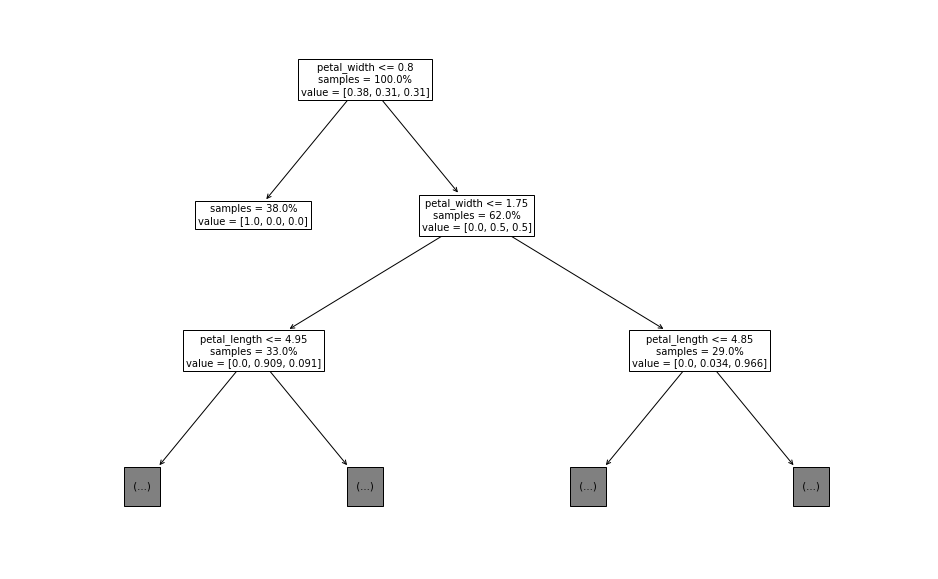

In [39]:
## 의사결정나무를 시각화합니다.
from sklearn import tree
import matplotlib.pyplot as plt

a=tree.plot_tree(dt,feature_names = ['sepal_length','sepal_width','petal_length','petal_width'],impurity=False, max_depth=2, fontsize=10, proportion=True)
plt.show(a)

<strong>Cross Validation</strong>

Cross validation을 통해 최적의 모델을 평가합니다.<br>
<strong>해당 사항은 추후 cross validation을 다루는 강의에서 다룰 것이기에 지금은 넘어가셔도 좋습니다.</strong>

In [18]:
# from sklearn.model_selection import cross_val_score
# import numpy as np
# dt = DecisionTreeClassifier(min_samples_split = 10)

In [1]:
# scores = cross_val_score(dt, iris[['sepal_length','sepal_width','petal_length','petal_width']], iris['species'], cv=5, scoring="accuracy")
# np.mean(scores)